# Clustering Project

## About the Dataset: [./german_credit_data.csv](./german_credit_data.csv)


### Context

The original dataset contains 1000 entries with 20 categorial/symbolic attributes. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

### Content

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 — unskilled and non-resident, 1 — unskilled and resident, 2 — skilled, 3 — highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text — little, moderate, quite rich, rich)
- Checking account (numeric, in DM — Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

## Your assignment (points in brackets):

1. (1P) Analyze and clean the data
  1. How many rows and columns and which data types?
1. (1P) Encode and normalize the data
1. (2P) Perform PCA and t-sne to visualize data
1. (3P) Find clusters by using k-means, Hierachical Clustering, and DBSCAN
1. (3P) Explain your results


### Imports:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
import warnings
warnings.filterwarnings("ignore")

In [2]:
credit_data = pd.read_csv('./german_credit_data.csv', sep=',', usecols=['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose'])

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Job'}>],
       [<Axes: title={'center': 'Credit amount'}>,
        <Axes: title={'center': 'Duration'}>]], dtype=object)

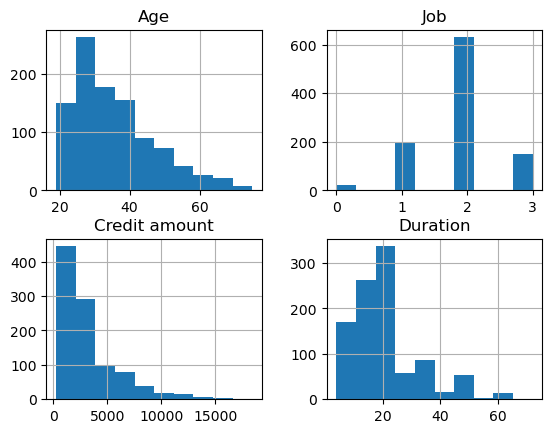

In [3]:
credit_data.hist()

# Task 1 Analyze and clean the data

# Statistical Information

<p>In this section, I've compiled certain statistical observations regarding the credit data. Although not particularly captivating, there are a couple of noteworthy points:</p>
<ul>
    <li>The average age of credit applicants is approximately 36 years;</li>
    <li>Typically, individuals seeking credit are employed in skilled occupations, indicating a prerequisite for prior experience;</li>
    <li>The average amount of credit sought by individuals is around 3300DM, with common values falling between 6000DM and 450DM;</li>
    <li>The highest requested credit amount reached 18424DM;</li>
    <li>The average duration for credit repayment is about 21 months, equivalent to roughly two years;</li>
    <li>The longest observed credit term extended to 72 months, totaling 6 years.</li>
</ul>

In [4]:
credit_data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


<h3>Categorical Data</h3>

<p>In the following analysis, I've encapsulated some remarkably insightful details about the categorical data. These observations were deduced from the visual representations provided below: </p>
<p><b>Housing</b>: A significant majority of credit applicants own or reside in a comfortable and inviting house;</p>
<p><b>Savings Account</b>: The prevalent trend among credit takers is having a modest amount of money invested in their savings account;</p>
<p><b>Checking Account</b>: The majority of individuals seeking credit tend to maintain either a small or moderate balance in their checking account;</p>
<p><b>Purpose</b>: The primary motivations behind individuals seeking credit encompass purchasing a car, acquiring a radio/TV, and obtaining furniture/equipment;</p>

<Axes: xlabel='Housing'>

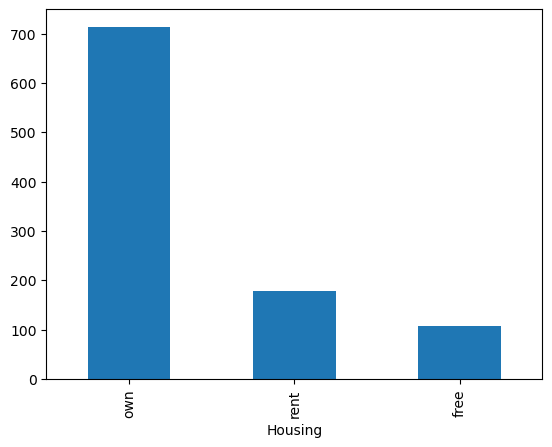

In [5]:
credit_data['Housing'].value_counts().plot(kind='bar')

<Axes: xlabel='Saving accounts'>

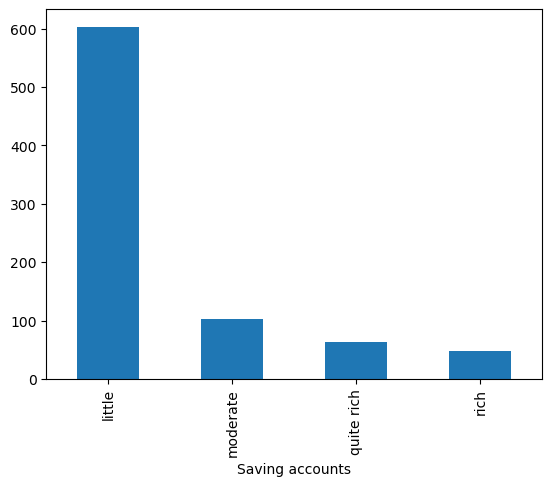

In [6]:
credit_data['Saving accounts'].value_counts().plot(kind='bar')

<Axes: xlabel='Checking account'>

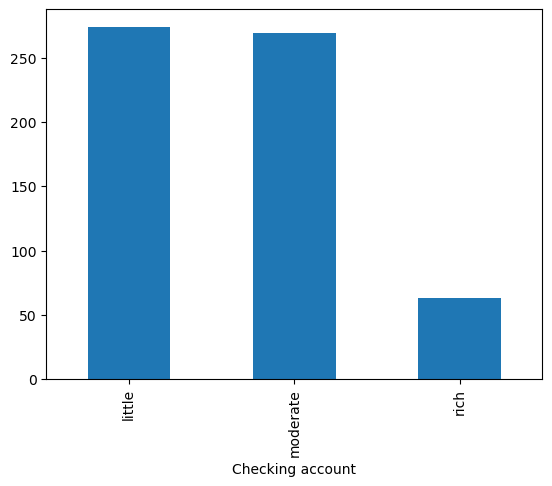

In [7]:
credit_data['Checking account'].value_counts().plot(kind='bar')

<Axes: xlabel='Purpose'>

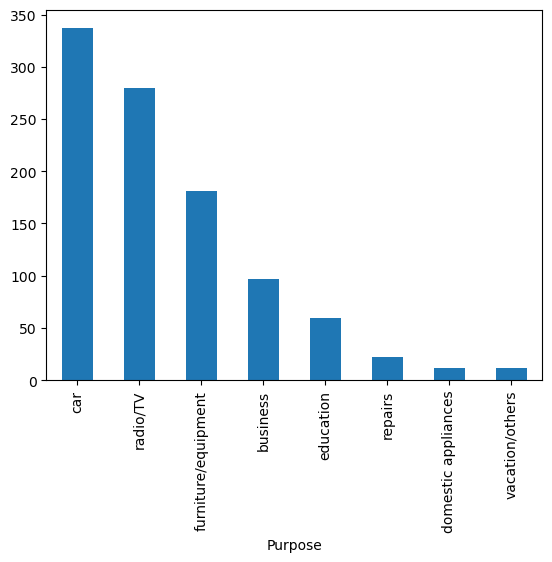

In [8]:
credit_data['Purpose'].value_counts().plot(kind='bar')

<h2>Clean the Data</h2>
<p>Upon scrutinizing both the statistical and categorical data analyses, there doesn't appear to be any discernible noise or incorrect values within the dataset. Therefore, our attention will be directed towards addressing missing values;</p>
<p>Upon closer examination, it is evident that the only features with missing values are 'Saving accounts' and 'Checking account'</p>

In [9]:
credit_data.isna().sum(axis=0)

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

<p>Identifying 394 missing values is indeed a concern, as it affects more than a third of our dataset. Opting to simply drop rows with N/A values would lead to a substantial loss of valuable information</p>
<p>Given the critical nature of data integrity, especially in the context of a bank, it is likely that these missing data points signify instances where the individual did not have a saving or checking account.</p>
<p>To accommodate this assumption, I will replace these missing values with a distinct category: "No Account." This strategy enables us to preserve the data for subsequent encoding and analysis</p>

In [10]:
credit_data_filtered = credit_data.copy()

credit_data_filtered = credit_data_filtered.dropna()

credit_data_filtered.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

<p>Now our data is clean </p>

<h1>TASK 1(A). How many rows and columns and which data types?</h1>

<p>Solution: With index of CSV</p>

In [11]:
df = pd.read_csv('german_credit_data.csv')
print("ROWS:",df.shape[0])
print("\nCOLUMNS:",df.shape[1])
print("\nCOLUMN : DATA TYPE:")
for column in df.columns:
    print(column,':',df[column].dtype)

ROWS: 1000

COLUMNS: 10

COLUMN : DATA TYPE:
Unnamed: 0 : int64
Age : int64
Sex : object
Job : int64
Housing : object
Saving accounts : object
Checking account : object
Credit amount : int64
Duration : int64
Purpose : object


<p>Solution: Without index of CSV</p>

In [12]:
df_1 = pd.read_csv('german_credit_data.csv', usecols=['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose'])
print("ROWS:",df_1.shape[0])
print("\nCOLUMNS:",df_1.shape[1])
print("\nCOLUMN : DATA TYPE:")
for column in df_1.columns:
    print(column,':',df_1[column].dtype)

ROWS: 1000

COLUMNS: 9

COLUMN : DATA TYPE:
Age : int64
Sex : object
Job : int64
Housing : object
Saving accounts : object
Checking account : object
Credit amount : int64
Duration : int64
Purpose : object


<h1>TASK 2. Encode and normalize the data</h1>

<p>We will commence the encoding process by transforming the non-numerical values: Sex, Housing, Saving accounts, Checking account, Purpose, and Risk.

Upon enumerating the potential categories within these columns, it becomes apparent that there are more than 17 options. Opting for one-hot encoding in this situation would lead to a considerably sparse dataset. It is generally advised that when the number of categories surpasses 17, a conventional label encoding is the more suitable approach—hence, that is the path we will follow<p>

In [13]:
credit_data_filtered_encoded = credit_data_filtered.copy()

for column in credit_data_filtered_encoded:
    if credit_data_filtered_encoded[column].dtype == 'object':
        credit_data_filtered_encoded[column] = LabelEncoder().fit_transform(credit_data_filtered_encoded[column])

credit_data_filtered_encoded

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,0,2,1,0,1,5951,48,5
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
7,35,1,3,2,0,1,6948,36,1
9,28,1,3,1,0,1,5234,30,1
...,...,...,...,...,...,...,...,...,...
989,48,1,1,1,0,1,1743,24,5
993,30,1,3,1,0,0,3959,36,4
996,40,1,3,1,0,0,3857,30,1
998,23,1,2,0,0,0,1845,45,5


<p>Now we normalize it</p>

In [14]:
X = credit_data_filtered_encoded.copy()

column_names = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=column_names)
X_scaled

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,-1.094447,-1.451600,0.182540,-0.144578,-0.451116,0.557302,0.913171,2.139356,1.063306
1,0.858575,0.688895,0.182540,-1.899688,-0.451116,-0.957863,1.573037,1.657897,0.561456
2,1.537887,0.688895,0.182540,-1.899688,-0.451116,-0.957863,0.543768,0.213521,-0.944093
3,0.009435,0.688895,1.648480,1.610532,-0.451116,0.557302,1.253868,1.176438,-0.944093
4,-0.584963,0.688895,1.648480,-0.144578,-0.451116,0.557302,0.668155,0.694979,-0.944093
...,...,...,...,...,...,...,...,...,...
517,1.113317,0.688895,-1.283399,-0.144578,-0.451116,0.557302,-0.524799,0.213521,1.063306
518,-0.415135,0.688895,1.648480,-0.144578,-0.451116,-0.957863,0.232459,1.176438,0.561456
519,0.434005,0.688895,1.648480,-0.144578,-0.451116,-0.957863,0.197603,0.694979,-0.944093
520,-1.009533,0.688895,0.182540,-1.899688,-0.451116,-0.957863,-0.489943,1.898626,1.063306


<h1>TASK 3. Perform PCA and t-sne to visualize data</h1>

<p>Even with the implementation of dimensionality reduction techniques such as PCA and t-SNE, the data exhibits challenges in segmentation.</p>
<ul>
    <li>The PCA result does not yield distinct clusters; however, it does bring to light some noticeable outliers within the data.</li>
    <li>The t-SNE visualization, while offering a more stratified outcome, doesn't form a few cohesive clusters. Instead, it presents numerous smaller clusters.</li>
</ul>


<h2>PCA</h2>

<p>At the outset, we perform PCA. Upon examining the Principal Components, it becomes apparent that they exhibit relatively low variances.

In the context of the PCA algorithm, low variance in principal components implies that the data points are closely clustered around the mean and demonstrate limited dispersion. Essentially, this suggests that the features within the dataset are relatively uniform, displaying minimal variability..</p>


In [15]:
pca = PCA(svd_solver='auto').fit(X_scaled)
print("PCA COMPONENTS:", pca.explained_variance_ratio_)
pca_transform = pca.transform(X_scaled)


PCA COMPONENTS: [0.21870722 0.14683083 0.12821007 0.11178444 0.09770054 0.09183674
 0.09110908 0.07398754 0.03983355]


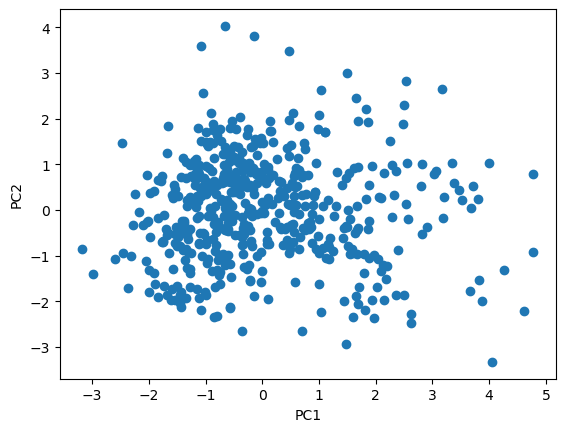

In [16]:
plot = plt.scatter(pca_transform[:,0], pca_transform[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

<h2>t-SNE</h2>

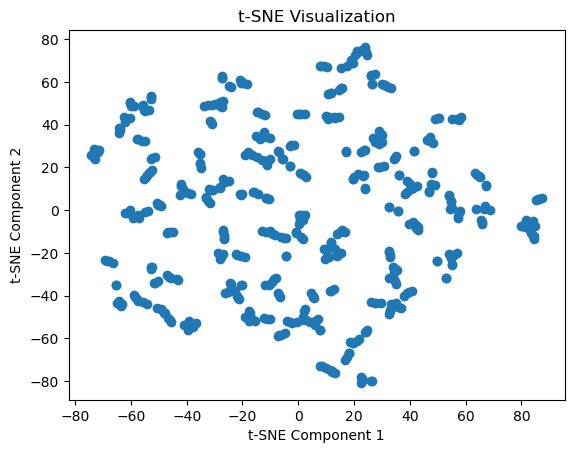

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_scaled)

plt.scatter(tsne[:, 0], tsne[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [18]:
print(X_scaled.dtypes)
print(X_scaled.head())


Age                 float64
Sex                 float64
Job                 float64
Housing             float64
Saving accounts     float64
Checking account    float64
Credit amount       float64
Duration            float64
Purpose             float64
dtype: object
        Age       Sex      Job   Housing  Saving accounts  Checking account  \
0 -1.094447 -1.451600  0.18254 -0.144578        -0.451116          0.557302   
1  0.858575  0.688895  0.18254 -1.899688        -0.451116         -0.957863   
2  1.537887  0.688895  0.18254 -1.899688        -0.451116         -0.957863   
3  0.009435  0.688895  1.64848  1.610532        -0.451116          0.557302   
4 -0.584963  0.688895  1.64848 -0.144578        -0.451116          0.557302   

   Credit amount  Duration   Purpose  
0       0.913171  2.139356  1.063306  
1       1.573037  1.657897  0.561456  
2       0.543768  0.213521 -0.944093  
3       1.253868  1.176438 -0.944093  
4       0.668155  0.694979 -0.944093  


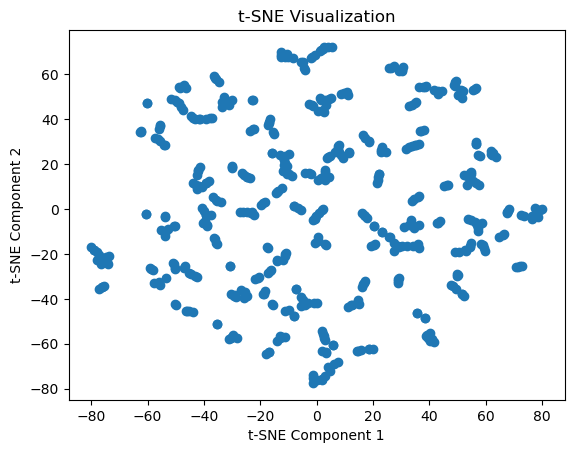

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=3).fit_transform(X_scaled)

plt.scatter(tsne[:, 0], tsne[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


<h2>TASK 4. Find clusters by using k-means, Hierachical Clustering, and DBSCAN</h2>

<h2>Kmeans</h2>

<p><b>Summary</b>: Upon the preliminary assessment, K-Means seems to excel in clustering. However, a closer examination, when comparing the results with the actual risk, unveils substantial discrepancies</p>
<p>Considering our objective is to categorize individuals seeking credit into either a risky or non-risky group, involving only two options, we have configured the number of clusters to k=2.</p>


<h2>Predicted (PCA Data)</h2>

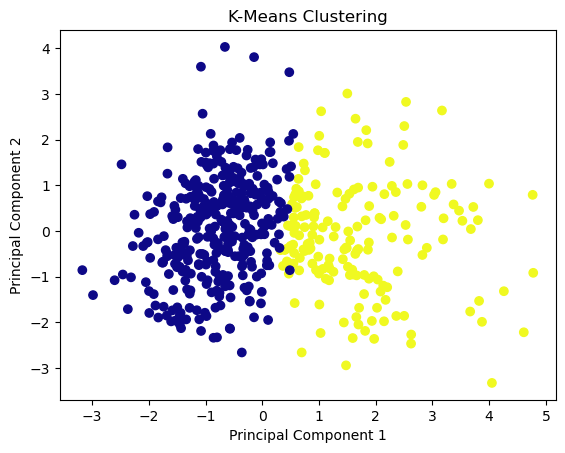

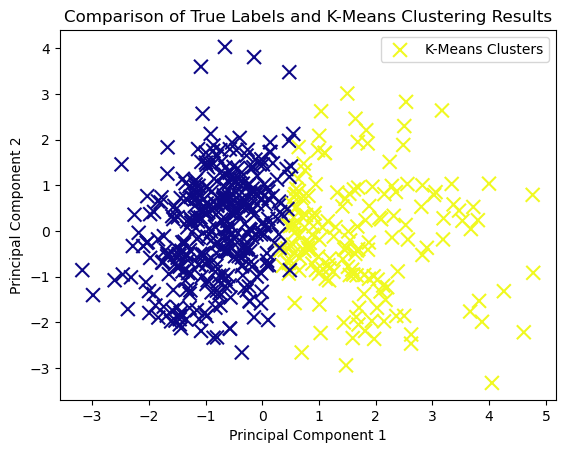

In [20]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(pca_transform)

plt.scatter(pca_transform[:, 0], pca_transform[:, 1], c=kmeans.labels_, cmap='plasma')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()




#clustering results shown

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(pca_transform)


#plt.scatter(pca_transform[:, 0], pca_transform[:, 1], c=y, marker='o', label='True Labels', cmap='viridis', alpha=0.5)
plt.scatter(pca_transform[:, 0], pca_transform[:, 1], c=kmeans.labels_, marker='x', label='K-Means Clusters', cmap='plasma', s=100)
plt.legend()
plt.title('Comparison of True Labels and K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


<h2>Actual (PCA Data)</h2>


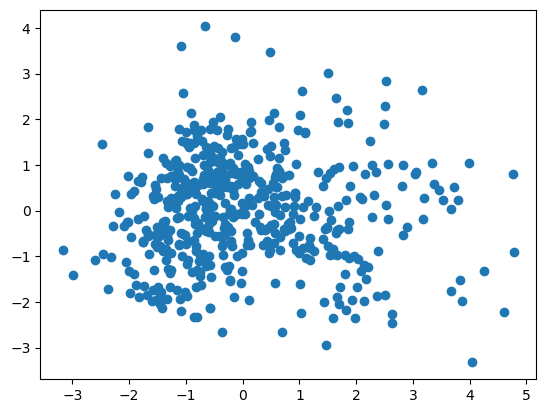

In [23]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(pca_transform)
# credit_data_filtered_encoded
plt.scatter(pca_transform[:,0] , pca_transform[:,1])
plt.show()

<h2>Predicted (T-SNE)</h2>

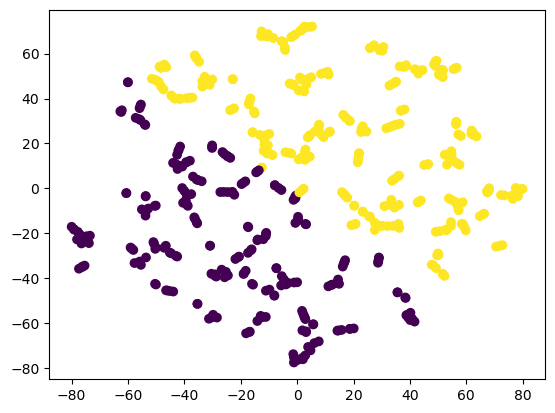

In [24]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(tsne)
# credit_data_filtered_encoded
plt.scatter(tsne[:,0] , tsne[:,1], c=kmeans.predict(tsne))
plt.show()

<h2>Actual (T-SNE) </h2>

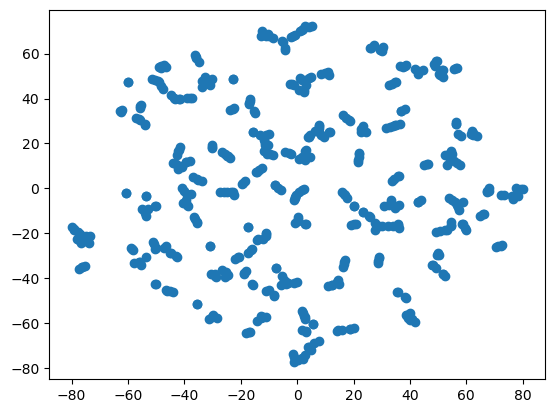

In [26]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(tsne)
# credit_data_filtered_encoded
plt.scatter(tsne[:,0] , tsne[:,1])
plt.show()

<h2>Dendogram</h2>

<p><b>Summary</b>: The dendrogram for PCA visually separates the entire set of data points into four distinct clusters.</p>
<p>The Dendogram for TSNE breaks the overall data points into 3 clusters.</p>

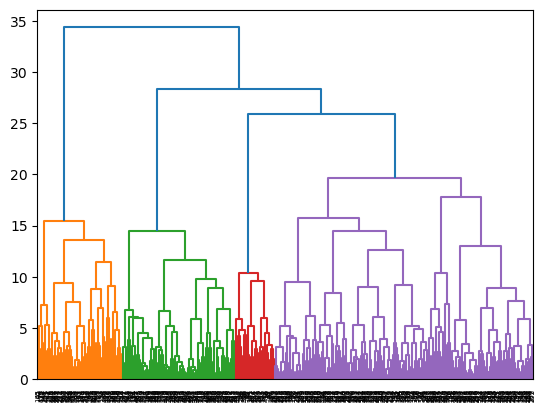

In [27]:
selected_data = pca_transform
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

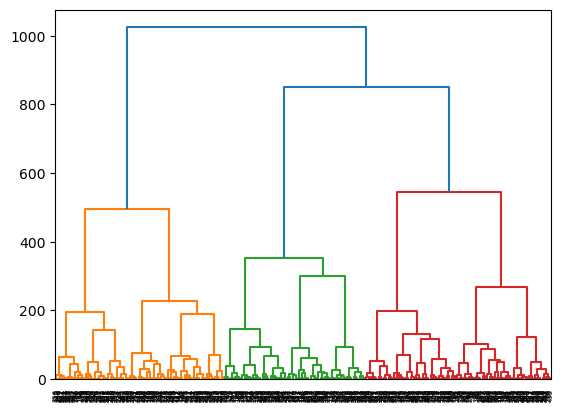

In [28]:
selected_data = tsne
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

<h2>DBSCAN</h2>

<p><b>Summary</b>: As expected, the visual representation of DBSCAN showcases suboptimal performance in both the PCA and t-SNE algorithms when attempting to form two clusters.</p>


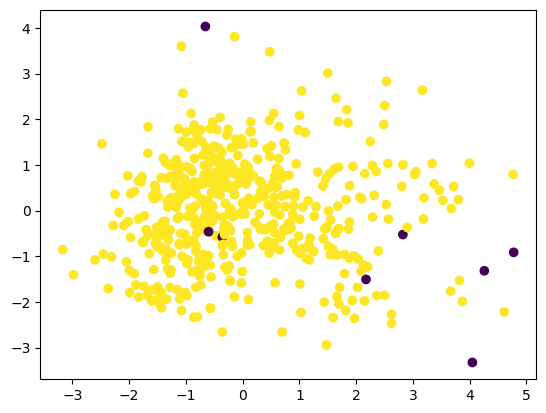

In [30]:
dbpca = DBSCAN(eps=3, min_samples=4).fit(pca_transform)
plt.scatter(pca_transform[:,0] , pca_transform[:,1], c=dbpca.fit_predict(pca_transform))
plt.show()

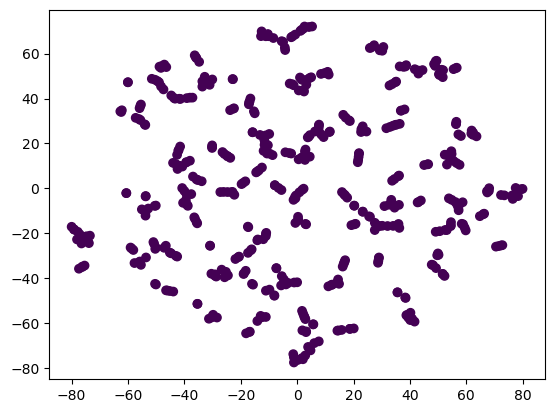

In [31]:
clustering = DBSCAN(eps=16, min_samples=1).fit(tsne)
plt.scatter(tsne[:,0] , tsne[:,1], c=clustering.fit_predict(tsne))
plt.show()

<h2>TASK 5. Explain your results</h2>

<p><b>PCA and T-SNE</b></p>
<p>The PCA analysis indicated a relatively low variance in its components, leading to a reduction of the data by one dimension. This resulted in less distinct clusters, making it challenging to identify clear patterns. In contrast, T-SNE revealed numerous segmented clusters, but none of them formed noticeable patterns that could be classified as high or low risk.</p>

<p><b>K-Means, Dendrogram, DBSCAN</b></p>
<p>Both K-Means and DBSCAN showed limited success in creating clusters when compared to the actual target in the PCA and T-SNE data. The dendrogram suggested that PCA and T-SNE were generally better at segmenting the data within 3 or 4 clusters.</p>
<p><b>Further Explanation</b>
    <p><b>PCA and T-SNE:</b></p>
    

<p>PCA Analysis: Principal Component Analysis (PCA) is a dimensionality reduction technique that identifies patterns and relationships within data. In this case, the variance in the PCA components was low, indicating that the data points were not well-separated in the reduced dimensional space.</p>

<p>T-SNE: t-Distributed Stochastic Neighbor Embedding (T-SNE) is another dimensionality reduction technique, often used for visualization. It created segmented clusters, but these clusters did not exhibit clear distinctions that could be associated with high or low-risk patterns.</p>

<p><b>K-Means, Dendrogram, DBSCAN:</b></p>


<p>K-Means: This clustering algorithm was not entirely successful in forming clusters that aligned with the actual risk categories in the PCA and T-SNE data.</p>

<p>Dendrogram: A dendrogram is a tree-like diagram that shows the hierarchical relationships between data points. In this context, it suggested that the data was better segmented into 3 or 4 clusters, as opposed to the 2 clusters assumed by K-Means.</p>

<p>DBSCAN: Density-Based Spatial Clustering of Applications with Noise (DBSCAN) exhibited suboptimal performance in forming two clusters, as expected</p>

<p><b>Conclusion</b></p>
<p>While attempts were made to cluster the data directly using PCA and T-SNE, a more comprehensive analysis is recommended:</p>
<ul>
    <li>Check feature correlations to identify potential candidates for removal.;</li>
    <li>Explore clustering not only on PCA and T-SNE but also on combinations of the original features;</li>
    <li>Create scatter plots of all feature combinations to understand relationships;</li>
    ~<li>+Use XGBBoost, best ML Algorithm ever
<p>In summary, a deeper level of preprocessing and analysis is essential to gain more meaningful insights into the clustering task.</p>
